In [1]:
!pip install control
!pip install matplotlib
!pip install numpy
!pip install spicy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 5.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(array([-2.+0.j]), array([-1.+0.j]))

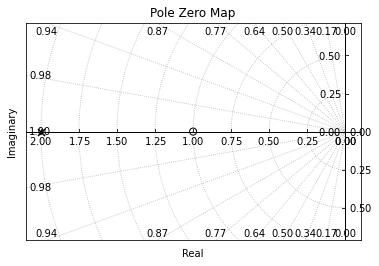

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import control as ctl
from control import (TransferFunction, step_response, bode_plot,
                     feedback, rlocus, margin, nyquist_plot)

# exemplo continuo
C = TransferFunction([1,1],[1,2]) 
ctl.pzmap(C,grid=True)






1.73 z - 1.264
--------------
  z - 0.5335

dt = 0.3141592653589793



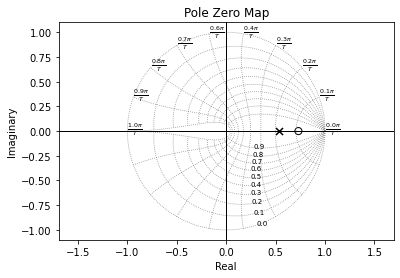

In [3]:
# mapeamento polos e zeros
To = np.pi/10
C = TransferFunction([1,1],[1,2]) 
Cd = ctl.c2d(C, To, method='matched')
ctl.pzmap(Cd,grid=True)
print(Cd)



z - 0.7667
----------
z - 0.5335

dt = 0.3141592653589793



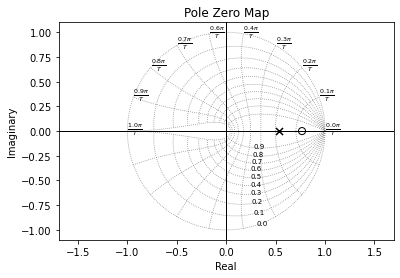

In [4]:

# Segurador de ordem zero
Cz = ctl.c2d(C, To, method='zoh')
ctl.pzmap(Cz,grid=True)
print(Cz)

G = TransferFunctionContinuous(
array([1., 1.]),
array([1., 2.]),
dt: None
)
G map = TransferFunctionDiscrete(
array([ 0.8661, -0.632 ]),
array([ 1.  , -0.53]),
dt: 0.3141592653589793
)
G zoh = TransferFunctionDiscrete(
array([ 1.    , -0.7667]),
array([ 1.    , -0.5335]),
dt: 0.3141592653589793
)


<function matplotlib.pyplot.show(*args, **kw)>

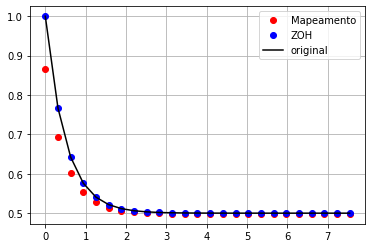

In [5]:
G = sig.lti([1, 1], [1, 2])
print('G =', G)

Gd = sig.dlti([0.8661, -0.632], [1, -0.53],dt=np.pi/10)
print('G map =', Gd)
td, yd = sig.dstep(Gd,n=25)

Gz = sig.dlti([1, -0.7667], [1, -0.5335],dt=np.pi/10)
print('G zoh =', Gz)
tz, yz = sig.dstep(Gz,n=25)

t, y = sig.step(G,X0=None, T=td, N=None)


plt.figure()
plt.plot(t, np.squeeze(yd),'ro')
plt.plot(t, np.squeeze(yz),'bo')
plt.plot(t, np.squeeze(y),'k')
plt.legend(["Mapeamento", "ZOH","original"])
plt.grid()
plt.show


